In [166]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame

In [167]:
# Load data of closing transaction
df = pd.read_csv('../CSV/df_TS_all.csv')
df.head()

,timestamp,item_id,target
0,2020-01-01,FR13,0
1,2020-01-01,GB02,0
2,2020-01-01,IT01,1239
3,2020-01-01,PL01,0
4,2020-01-01,RO01,0


In [168]:
# Swap timestamp and item_id column
df = df[['item_id', 'timestamp', 'target']]
df.head()

,item_id,timestamp,target
0,FR13,2020-01-01,0
1,GB02,2020-01-01,0
2,IT01,2020-01-01,1239
3,PL01,2020-01-01,0
4,RO01,2020-01-01,0


In [169]:
# Dimension of the data
print(df.shape)

(6080, 3)


In [170]:
# Get first date and last date
print(df['timestamp'].min())
print(df['timestamp'].max())


2020-01-01
2023-04-30


In [171]:
# Create a new df of the item_id equal to IT01 
df_IT = df[df['item_id'] == 'IT01']

# Handling of outliers

In [196]:
# Mean, variance and standard deviation of the target variable for IT01
print("Mean: " + str(df_IT['target'].mean()))
print("Variance: " + str(df_IT['target'].var()))
print("Standard Deviation: " + str(df_IT['target'].std()))

# Print max and min of the target variable for IT01
print("Max value: " + str(df_IT['target'].max()))
print("Min value: " + str(df_IT['target'].min()))


Mean: 323.1891447368421
Variance: 640033.5559643739
Standard Deviation: 800.0209722028378
Max value: 12113
Min value: 0


In [186]:
# Print all rows where the target variable is is larger than 100 than the mean value of the target variable
print(df_IT[df_IT['target'] > df_IT['target'].mean() + 100])

     item_id  timestamp  target
2       IT01 2020-01-01    1239
7       IT01 2020-01-02     691
12      IT01 2020-01-03    4221
17      IT01 2020-01-04    1158
152     IT01 2020-01-31     624
172     IT01 2020-02-04    1417
182     IT01 2020-02-06    2255
187     IT01 2020-02-07     438
212     IT01 2020-02-12     433
257     IT01 2020-02-21     440
277     IT01 2020-02-25     564
287     IT01 2020-02-27     723
307     IT01 2020-03-02    1254
317     IT01 2020-03-04     589
322     IT01 2020-03-05    1334
347     IT01 2020-03-10    1213
357     IT01 2020-03-12    1287
362     IT01 2020-03-13     594
427     IT01 2020-03-26     434
452     IT01 2020-03-31     458
457     IT01 2020-04-01    1135
467     IT01 2020-04-03    1879
532     IT01 2020-04-16     430
597     IT01 2020-04-29     688
602     IT01 2020-04-30     429
612     IT01 2020-05-02     983
632     IT01 2020-05-06    1152
637     IT01 2020-05-07     779
657     IT01 2020-05-11     517
762     IT01 2020-06-01    1040
772     

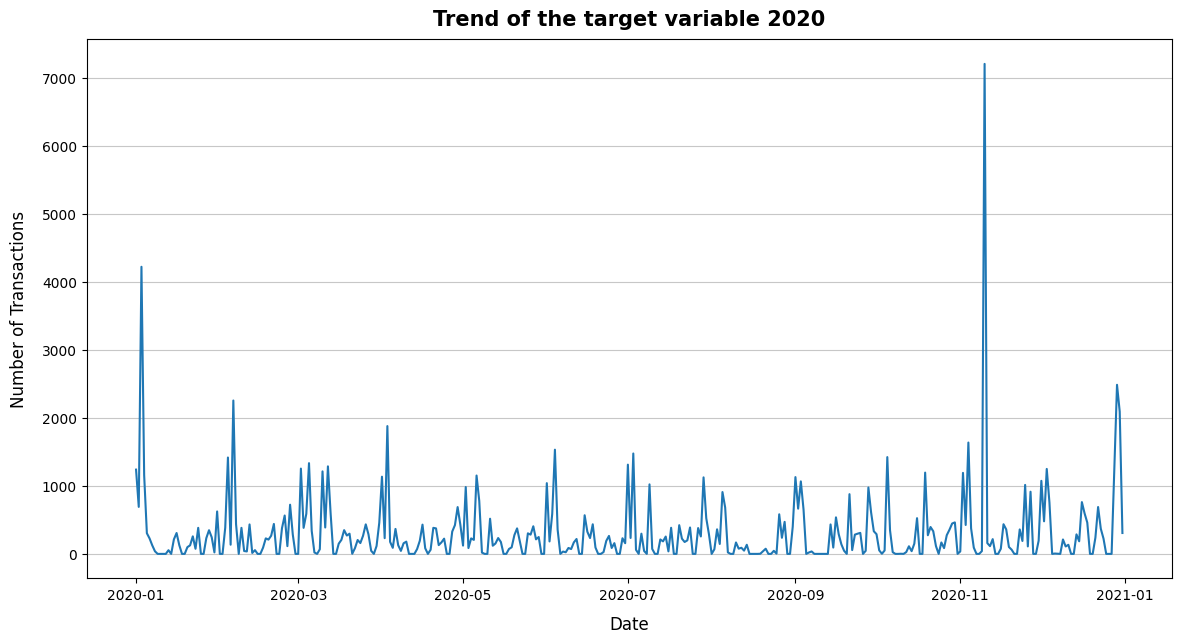

In [181]:
# Show the trend of the target variable for the 2020 year 
plt.figure(figsize=(14, 7))
plt.plot(df_IT[df_IT['timestamp'] <= '2020-12-31']['timestamp'],
         df_IT[df_IT['timestamp'] <= '2020-12-31']['target'])

plt.title('Trend of the target variable 2020', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Number of Transactions', fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.show()


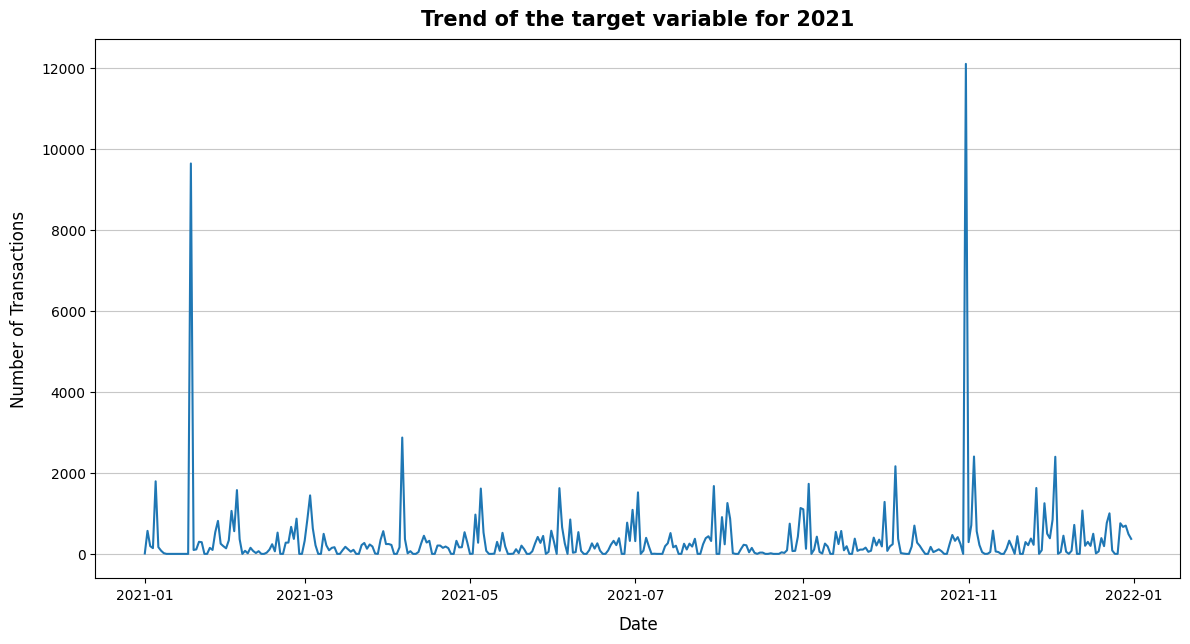

In [182]:
# Show the trend of the target variable for the 2021 year
plt.figure(figsize=(14, 7))
plt.plot(df_IT[(df_IT['timestamp'] >= '2021-01-01') & (df_IT['timestamp'] < '2022-01-01')]['timestamp'],
         df_IT[(df_IT['timestamp'] >= '2021-01-01') & (df_IT['timestamp'] < '2022-01-01')]['target'])

plt.title('Trend of the target variable for 2021', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Number of Transactions', fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.show()


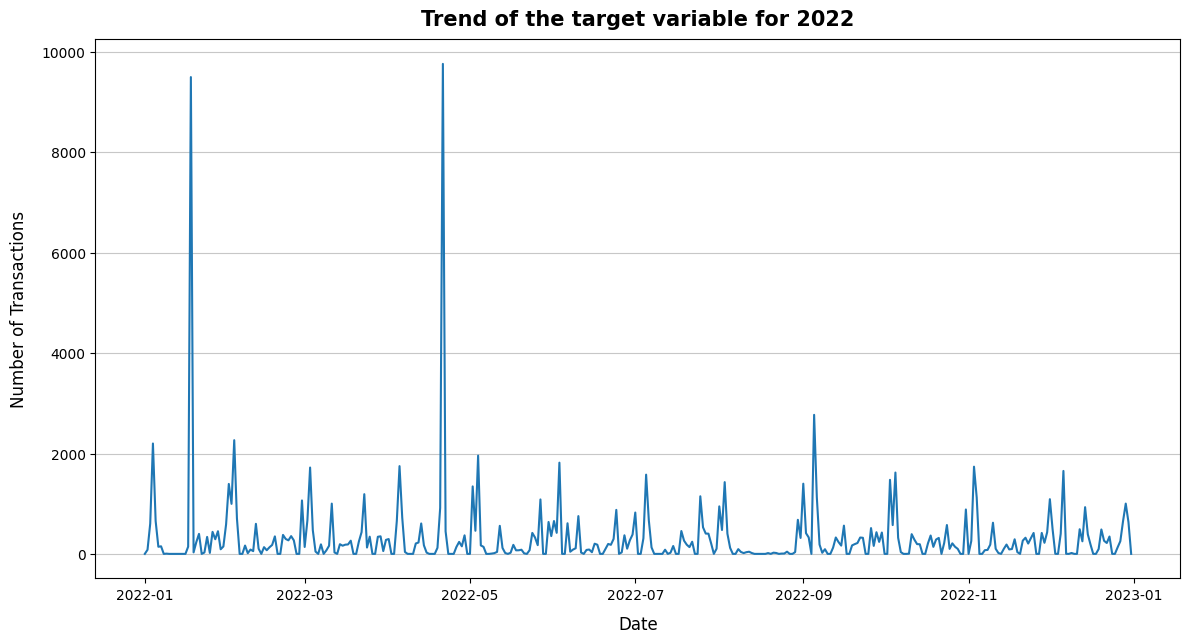

In [183]:
# Show the trend of the target variable for the 2022 year
plt.figure(figsize=(14, 7))
plt.plot(df_IT[(df_IT['timestamp'] >= '2022-01-01') & (df_IT['timestamp'] < '2023-01-01')]['timestamp'],
         df_IT[(df_IT['timestamp'] >= '2022-01-01') & (df_IT['timestamp'] < '2023-01-01')]['target'])

plt.title('Trend of the target variable for 2022', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Number of Transactions', fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.show()


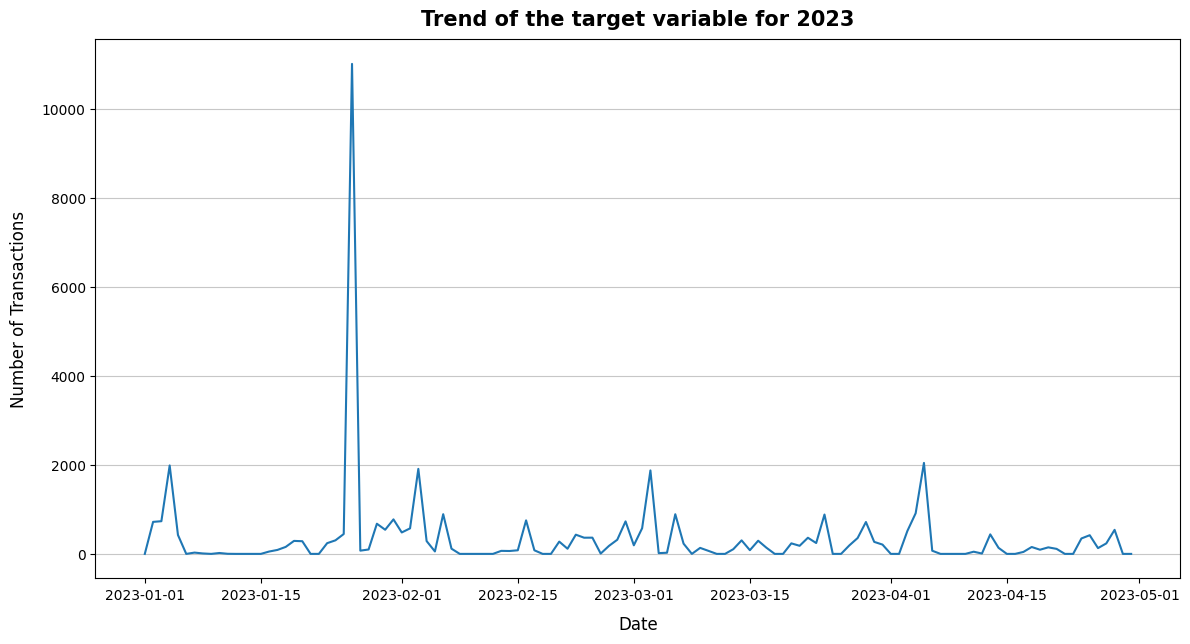

In [184]:
# Show the trend of the target variable for the 2023 year
plt.figure(figsize=(14, 7))
plt.plot(df_IT[(df_IT['timestamp'] >= '2023-01-01') & (df_IT['timestamp'] < '2024-01-01')]['timestamp'],
         df_IT[(df_IT['timestamp'] >= '2023-01-01') & (df_IT['timestamp'] < '2024-01-01')]['target'])

plt.title('Trend of the target variable for 2023', fontsize=15, fontweight='bold', pad=10)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Number of Transactions', fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.show()


In [143]:
# Split data into training and testing set; train set based on timestamp from 2020-01-01 to 2022-04-30 and test set based on timestamp from 2022-05-01 to 2023-04-30
train_data = df_IT[df_IT['timestamp'] <= '2022-04-30']
test_data = df_IT[df_IT['timestamp'] > '2022-04-30']

# Calculate the percentage of the training set and testing set
print(train_data.shape[0] / df_IT.shape[0])
print(test_data.shape[0] / df_IT.shape[0])

0.6998355263157895
0.3001644736842105


In [144]:
# Convert train_data to TimeSeriesDataFrame
train_data = TimeSeriesDataFrame(
    train_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

train_data.head()

target
item_id timestamp         
IT01    2020-01-01    1239
        2020-01-02     691
        2020-01-03    4221
        2020-01-04    1158
        2020-01-05     304

In [114]:
# Convert test_data to TimeSeriesDataFrame (take only row with item_id = 'IT01')
test_data = TimeSeriesDataFrame(
    test_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

test_data.head()

target
item_id timestamp         
IT01    2022-05-01       0
        2022-05-02    1345
        2022-05-03     461
        2022-05-04    1959
        2022-05-05     169

In [115]:
# Add weekend column to the train_data to indicate if the day is a weekend or not (1 for weekend, 0 for weekday)
timestamps= train_data.index.get_level_values('timestamp')
WEEKEND_INDICES = [5, 6]

train_data['weekend'] = timestamps.weekday.isin(WEEKEND_INDICES).astype(int)

train_data.head()


target  weekend
item_id timestamp                  
IT01    2020-01-01    1239        0
        2020-01-02     691        0
        2020-01-03    4221        0
        2020-01-04    1158        1
        2020-01-05     304        1

In [116]:
# Add weekend column to the test_data to indicate if the day is a weekend or not (1 for weekend, 0 for weekday)
timestamps= test_data.index.get_level_values('timestamp')
WEEKEND_INDICES = [5, 6]

test_data['weekend'] = timestamps.weekday.isin(WEEKEND_INDICES).astype(int)

test_data.head()

target  weekend
item_id timestamp                  
IT01    2022-05-01       0        1
        2022-05-02    1345        0
        2022-05-03     461        0
        2022-05-04    1959        0
        2022-05-05     169        0

In [117]:
# Print first 10 row where item_id is IT01
train_data.loc['IT01'].head(7)


,target,weekend
timestamp,,
2020-01-01,1239,0
2020-01-02,691,0
2020-01-03,4221,0
2020-01-04,1158,1
2020-01-05,304,1
2020-01-06,227,0
2020-01-07,125,0


In [118]:
# Build predictor
predictor = TimeSeriesPredictor(
    prediction_length=30,
    freq='D',
    target='target',
    known_covariates_names=['weekend'],
    path='test_prediction',
    eval_metric='MASE'
)

In [119]:
# Fit the model
predictor.fit(
    train_data,
    presets='best_quality',
    time_limit=2400
)

Beginning AutoGluon training... Time limit = 2400s
AutoGluon will save models to 'test_prediction'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.9.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
GPU Count:          0
Memory Avail:       5.05 GB / 15.78 GB (32.0%)
Disk Space Avail:   96.75 GB / 475.83 GB (20.3%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'freq': 'D',
 'hyperparameters': 'default',
 'known_covariates_names': ['weekend'],
 'num_val_windows': 2,
 'prediction_length': 30,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'target',
 'time_limit': 2400,
 'verbosity': 2}

Provided train_data has 851 rows, 1 time series. Median time series length is 851 (min=851, max=851). 

Provided dataset contains fol

In [120]:
from autogluon.timeseries.utils.forecast import get_forecast_horizon_index_ts_dataframe

future_index = get_forecast_horizon_index_ts_dataframe(train_data, prediction_length=30)
future_timestamps = future_index.get_level_values("timestamp")
known_covariates = pd.DataFrame(index=future_index)
known_covariates["weekend"] = future_timestamps.weekday.isin(WEEKEND_INDICES).astype(float)

known_covariates.head()

weekend
item_id timestamp          
IT01    2022-05-01      1.0
        2022-05-02      0.0
        2022-05-03      0.0
        2022-05-04      0.0
        2022-05-05      0.0

In [121]:
# Make prediction on training data
predictions = predictor.predict(train_data, known_covariates=known_covariates)
predictions.head()

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean         0.1         0.2         0.3  \
item_id timestamp                                                     
IT01    2022-05-01    68.879193 -251.081198 -100.488571   -1.126908   
        2022-05-02   891.012087  271.965615  375.054171  519.202227   
        2022-05-03  1070.919791  383.728284  541.209245  650.621941   
        2022-05-04  1050.127451  391.354005  558.073697  647.037266   
        2022-05-05   526.215738  101.570848  270.685295  321.908604   

                           0.4          0.5          0.6          0.7  \
item_id timestamp                                                       
IT01    2022-05-01 -120.106278    68.879193    88.244411   100.009636   
        2022-05-02  624.447719   891.012087  1073.891463  1550.745725   
        2022-05-03  865.013221  1070.919791  1386.103143  1754.533483   
        2022-05-04  911.790090  1050.127451  1425.184161  1664.334363   
        2022-05-05  389.701116   526.215738   747.925343   791.153646   

                            0.8          0.9  
item_id timestamp                             
IT01    2022-05-01   298.755002   579.452404  
        2022-05-02  2060.635372  3165.675980  
        2022-05-03  2321.780961  3385.592682  
        2022-05-04  2242.986725  3202.203405  
        2022-05-05  1290.268153  1957.081046

In [122]:
predictor.leaderboard(test_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,DeepAR,-0.306110,-0.903238,0.221401,0.170353,378.377953,9
1,WeightedEnsemble,-0.409095,-0.793001,0.274052,0.207443,3.695805,12
2,TemporalFusionTransformer,-0.415876,-0.793201,0.052651,0.037090,549.867460,10
3,PatchTST,-0.478116,-0.883623,0.066875,0.026938,92.391703,11
4,NPTS,-0.498218,-0.860652,0.136261,0.175433,0.225068,3
5,DirectTabular,-0.536837,-0.868291,0.087564,0.075091,1.418761,8
6,SeasonalNaive,-0.581180,-1.053472,2.244776,0.047956,0.080500,1
7,AutoETS,-0.658225,-1.005633,26.849821,0.179989,16.524740,4
8,DynamicOptimizedTheta,-0.698794,-1.025342,12.611548,0.240030,18.230060,5
9,CrostonSBA,-0.738126,-1.041534,12.120167,0.037691,8.365154,2


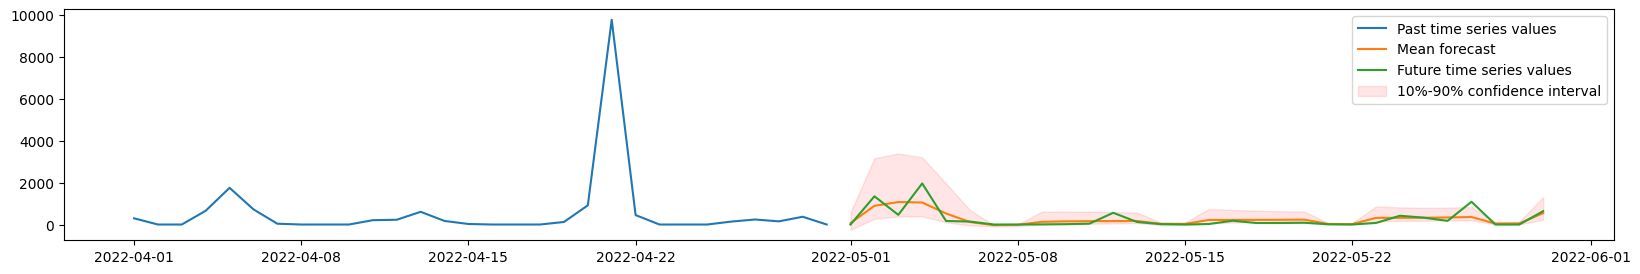

In [123]:
plt.figure(figsize=(20, 3))

item_id = "IT01"
y_past = train_data.loc[item_id]["target"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["target"][:30]

plt.plot(y_past[-30:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend()

In [124]:
# Print all row of predictions where item_id is IT01
predictions.loc['IT01']

,mean,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
timestamp,,,,,,,,,,
2022-05-01,68.879193,-251.081198,-100.488571,-1.126908,-120.106278,68.879193,88.244411,100.009636,298.755002,579.452404
2022-05-02,891.012087,271.965615,375.054171,519.202227,624.447719,891.012087,1073.891463,1550.745725,2060.635372,3165.675980
2022-05-03,1070.919791,383.728284,541.209245,650.621941,865.013221,1070.919791,1386.103143,1754.533483,2321.780961,3385.592682
2022-05-04,1050.127451,391.354005,558.073697,647.037266,911.790090,1050.127451,1425.184161,1664.334363,2242.986725,3202.203405
2022-05-05,526.215738,101.570848,270.685295,321.908604,389.701116,526.215738,747.925343,791.153646,1290.268153,1957.081046
2022-05-06,116.566715,-45.746612,44.230870,93.410070,49.061028,116.566715,175.802043,173.369871,433.840482,693.632822
2022-05-07,-28.943940,-86.111570,-65.453876,-71.350409,13.119835,-28.943940,-20.956524,-49.268086,-4.487802,-27.416779
2022-05-08,-15.457934,-76.999390,-58.719534,-61.628070,14.985467,-15.457934,0.633366,-26.951305,-0.265359,1.700721
2022-05-09,127.624825,-9.369062,60.398707,51.471482,28.429238,127.624825,111.682431,184.336180,339.812629,609.496009


In [125]:
# Sum all value of mean forecast of predictions where item_id is IT01
predictions.loc['IT01']['mean'].sum()

7957.680615457315

In [126]:
# Sum all value of target of test_data where item_id is IT01 and timestamp is from 2022-05-01 to 2022-05-30
test_data.loc['IT01']['target'][:30].sum()


7983

In [127]:
# Calculate difference betweend each prediction and actual value of test_data
diff = predictions.loc['IT01']['mean'] - test_data.loc['IT01']['target'][:30]
diff


timestamp
2022-05-01     68.879193
2022-05-02   -453.987913
2022-05-03    609.919791
2022-05-04   -908.872549
2022-05-05    357.215738
2022-05-06    -23.433285
2022-05-07    -28.943940
2022-05-08    -15.457934
2022-05-09    121.624825
2022-05-10    134.659718
2022-05-11    120.307241
2022-05-12   -395.822240
2022-05-13     50.696172
2022-05-14     15.454475
2022-05-15     26.735784
2022-05-16    194.895160
2022-05-17     38.864859
2022-05-18    149.204409
2022-05-19    152.714201
2022-05-20    149.228818
2022-05-21     16.772410
2022-05-22     18.770444
2022-05-23    242.788299
2022-05-24    -98.009311
2022-05-25     -3.522046
2022-05-26    162.637097
2022-05-27   -727.571064
2022-05-28     43.683633
2022-05-29     47.961484
2022-05-30    -92.712854
dtype: float64